## Previously implemented steps with reduced dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm

In [9]:
dataset = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.csv"
dataset1 = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\idx_to_feature_name.csv"
timestamp_dataset = np.load(r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.npy")
development = pd.read_csv(dataset)

idx_to_feature_name = pd.read_csv(dataset1)

In [10]:
timestamp_dataset = np.swapaxes(timestamp_dataset, 1, 2)

x, y, z = np.shape(timestamp_dataset) # shape is 45296 44 175
print(f"x,y,z :{x,y,z}")
timestamp_dataset_xyz = timestamp_dataset.reshape((x * y, z))

print(f"timestamp_dataset_xyz shape: {np.shape(timestamp_dataset_xyz)}")

df = pd.DataFrame(timestamp_dataset_xyz)
df.columns = list(idx_to_feature_name['feature_name'])

x,y,z :(45296, 44, 175)
timestamp_dataset_xyz shape: (1993024, 175)


In [11]:
labels = development['word'].repeat(44).reset_index(drop=True)
df['label'] = labels
print(df.shape)
print(df.head())

(1993024, 176)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   
2  3458.654191  3094.048944    2.354364   11.720385    5.284093   13.498349   
3  3566.314690  3771.505801    2.519493    3.772937    6.171315   11.707870   
4  3798.595277  3539.935021    1.564043    5.580149   11.447674    8.371300   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_26  mfcc_d2_27  \
0   11.919620   14.669121   14.585381  1.228449  ...    0.017583    0.001675   
1   17.888832   14.893607   17.731615  0.661205  ...    0.017583    0.001675   
2   11.968940   14.713264   18.549921  0.540481  ...    0.017583    0.001675   
3    8.954777   10.262776   11.503663  0.477311  ...    0.017583    0.001675   
4    6.541367   16.620921   12.307588  0.533642  ...    0.017583    0.001675   

   mfcc_d2_28  mfcc_d2_29  mf

In [12]:
encoder = LabelEncoder()

encoded_labels = encoder.fit_transform(df['label'])

df['encoded_label'] = encoded_labels

In [17]:
labels = development['word'].repeat(44).reset_index(drop=True)
df['label'] = labels
print(df.shape)
print(df.head())

(1993024, 177)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   
2  3458.654191  3094.048944    2.354364   11.720385    5.284093   13.498349   
3  3566.314690  3771.505801    2.519493    3.772937    6.171315   11.707870   
4  3798.595277  3539.935021    1.564043    5.580149   11.447674    8.371300   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0   11.919620   14.669121   14.585381  1.228449  ...    0.001675   -0.032088   
1   17.888832   14.893607   17.731615  0.661205  ...    0.001675   -0.032088   
2   11.968940   14.713264   18.549921  0.540481  ...    0.001675   -0.032088   
3    8.954777   10.262776   11.503663  0.477311  ...    0.001675   -0.032088   
4    6.541367   16.620921   12.307588  0.533642  ...    0.001675   -0.032088   

   mfcc_d2_29  mfcc_d2_30  mf

In [18]:
df.head(45)

,bandwidth_0,centroid_0,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,energy_0,...,mfcc_d2_27,mfcc_d2_28,mfcc_d2_29,mfcc_d2_30,mfcc_d2_31,power_0,yin_0,zcr_0,label,encoded_label
0,3215.288398,3163.578230,3.429333,10.210643,7.815739,9.503703,11.919620,14.669121,14.585381,1.228449,...,0.001675,-0.032088,0.028205,0.040544,0.030476,0.011929,125.766811,0.3500,Brötchen,1
1,3390.327986,3140.046112,1.373135,4.969057,7.083958,8.309203,17.888832,14.893607,17.731615,0.661205,...,0.001675,-0.032088,0.028205,0.040544,0.030476,0.003397,121.098354,0.3150,Brötchen,1
2,3458.654191,3094.048944,2.354364,11.720385,5.284093,13.498349,11.968940,14.713264,18.549921,0.540481,...,0.001675,-0.032088,0.028205,0.040544,0.030476,0.002294,103.804931,0.3075,Brötchen,1
3,3566.314690,3771.505801,2.519493,3.772937,6.171315,11.707870,8.954777,10.262776,11.503663,0.477311,...,0.001675,-0.032088,0.028205,0.040544,0.030476,0.001489,103.967886,0.4025,Brötchen,1
4,3798.595277,3539.935021,1.564043,5.580149,11.447674,8.371300,6.541367,16.620921,12.307588,0.533642,...,0.001675,-0.032088,0.028205,0.040544,0.030476,0.002341,228.250162,0.3800,Brötchen,1
5,3560.958263,3996.961017,0.745030,6.363715,7.923013,19.922739,9.471841,14.137539,11.654784,0.491939,...,-0.078202,-0.037629,0.088407,0.074848,0.029059,0.001610,119.340569,0.4000,Brötchen,1
6,3854.339049,3824.283128,2.722446,7.078253,7.329141,16.673738,16.207704,11.235617,17.138206,0.543368,...,-0.004052,0.065653,0.065838,-0.072963,-0.010714,0.002505,334.118373,0.4100,Brötchen,1
7,3768.389186,3200.971670,8.067148,2.930203,6.122826,16.140361,11.301804,17.395814,12.711569,0.567690,...,-0.027885,0.024970,0.009995,-0.051937,-0.015215,0.003214,119.118247,0.3400,Brötchen,1
8,3319.838604,2474.266231,9.315039,10.976622,6.904940,8.513068,15.036979,13.718473,16.425700,5.019680,...,-0.041393,0.053826,-0.000475,-0.037120,-0.023709,0.343953,235.998549,0.1950,Brötchen,1
9,1098.674297,564.614963,3.788211,14.370101,4.541206,15.807267,13.692530,12.039087,14.804950,36.156906,...,0.036951,0.089339,0.029833,-0.012726,-0.046899,92.290276,234.753078,0.0425,Brötchen,1


## Split the dataset to 1/3 and shuffle

In [34]:
# Shuffle the DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)

In [35]:
shuffled_df.head(15)

,bandwidth_0,centroid_0,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,energy_0,...,mfcc_d2_27,mfcc_d2_28,mfcc_d2_29,mfcc_d2_30,mfcc_d2_31,power_0,yin_0,zcr_0,label,encoded_label
0,3900.644073,2889.049473,16.274282,9.417471,5.553480,13.434897,10.929888,11.489753,12.203249,1.677356,...,0.043019,-0.036784,-0.046845,-0.089346,-0.013449,0.077389,100.000000,0.1150,Haus,3
1,1385.955235,500.152755,17.818327,10.017926,6.967967,24.060781,14.289769,17.917083,13.089963,19.312712,...,-0.010266,-0.030265,0.074465,0.131090,-0.030732,31.850468,123.402623,0.0325,Haus,3
2,986.375646,486.088429,10.901464,5.318934,9.604191,27.445856,13.030354,18.225401,17.395027,16.359266,...,0.077362,0.052671,-0.015627,-0.050885,-0.045600,28.057058,136.394869,0.0525,Schraube,10
3,2821.900824,1438.929368,5.481157,10.343477,11.021656,8.289373,19.964211,11.330488,15.819080,2.203705,...,-0.031458,0.030557,-0.009200,-0.026428,-0.061521,0.280674,101.935141,0.0475,an,13
4,986.419612,469.830949,2.150323,14.489825,19.253875,9.553289,14.676958,19.527705,17.472727,5.143209,...,-0.018311,0.050365,0.034864,0.003416,0.089122,5.121705,209.715465,0.0275,kann,15
5,2086.884202,1056.477523,21.627762,4.879927,10.358412,15.298214,23.183948,19.189253,23.818558,23.927536,...,0.013788,-0.036859,-0.012604,-0.053840,0.052723,27.707357,183.325067,0.0775,Fernseher,2
6,3496.734073,2993.919095,12.964532,2.694458,9.710298,7.914668,9.745479,10.928573,17.619892,0.184735,...,-0.007500,-0.028265,-0.041461,0.059544,0.039668,0.000301,716.903938,0.1950,aus,14
7,2070.252939,984.815607,3.394388,4.488344,10.228048,9.990442,15.385991,13.093637,12.326701,3.828734,...,-0.041248,0.105552,0.049355,-0.082040,-0.009023,0.625301,220.616513,0.0525,an,13
8,3132.965983,2009.421468,6.189726,2.847820,8.725745,9.427150,10.712564,12.079597,19.131583,0.134644,...,-0.004351,0.039594,-0.019086,-0.003760,0.034824,0.000339,412.113498,0.1075,nicht,16
9,2904.550985,1514.481104,8.081314,5.732245,8.792498,6.482046,11.036517,12.346679,15.087120,1.540839,...,-0.010034,-0.037286,-0.002067,0.075136,0.013070,0.072753,303.760111,0.0925,Fernseher,2


In [36]:
split_coef = 100
one_third_size = len(shuffled_df) // split_coef
new_df = shuffled_df.iloc[:one_third_size]

labels = shuffled_df['label']

labels = labels[:one_third_size]

new_df['label'] = labels

print(new_df.shape)
print(new_df.head())

(19930, 177)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3900.644073  2889.049473   16.274282    9.417471    5.553480   13.434897   
1  1385.955235   500.152755   17.818327   10.017926    6.967967   24.060781   
2   986.375646   486.088429   10.901464    5.318934    9.604191   27.445856   
3  2821.900824  1438.929368    5.481157   10.343477   11.021656    8.289373   
4   986.419612   469.830949    2.150323   14.489825   19.253875    9.553289   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0   10.929888   11.489753   12.203249   1.677356  ...    0.043019   -0.036784   
1   14.289769   17.917083   13.089963  19.312712  ...   -0.010266   -0.030265   
2   13.030354   18.225401   17.395027  16.359266  ...    0.077362    0.052671   
3   19.964211   11.330488   15.819080   2.203705  ...   -0.031458    0.030557   
4   14.676958   19.527705   17.472727   5.143209  ...   -0.018311    0.050365   

   mfcc_d2_29  mfcc_d2_30

C:\Users\azatv\AppData\Local\Temp\ipykernel_31008\784888527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['label'] = labels


In [37]:
new_df.head(15)

,bandwidth_0,centroid_0,contrast_0,contrast_1,contrast_2,contrast_3,contrast_4,contrast_5,contrast_6,energy_0,...,mfcc_d2_27,mfcc_d2_28,mfcc_d2_29,mfcc_d2_30,mfcc_d2_31,power_0,yin_0,zcr_0,label,encoded_label
0,3900.644073,2889.049473,16.274282,9.417471,5.553480,13.434897,10.929888,11.489753,12.203249,1.677356,...,0.043019,-0.036784,-0.046845,-0.089346,-0.013449,0.077389,100.000000,0.1150,Haus,3
1,1385.955235,500.152755,17.818327,10.017926,6.967967,24.060781,14.289769,17.917083,13.089963,19.312712,...,-0.010266,-0.030265,0.074465,0.131090,-0.030732,31.850468,123.402623,0.0325,Haus,3
2,986.375646,486.088429,10.901464,5.318934,9.604191,27.445856,13.030354,18.225401,17.395027,16.359266,...,0.077362,0.052671,-0.015627,-0.050885,-0.045600,28.057058,136.394869,0.0525,Schraube,10
3,2821.900824,1438.929368,5.481157,10.343477,11.021656,8.289373,19.964211,11.330488,15.819080,2.203705,...,-0.031458,0.030557,-0.009200,-0.026428,-0.061521,0.280674,101.935141,0.0475,an,13
4,986.419612,469.830949,2.150323,14.489825,19.253875,9.553289,14.676958,19.527705,17.472727,5.143209,...,-0.018311,0.050365,0.034864,0.003416,0.089122,5.121705,209.715465,0.0275,kann,15
5,2086.884202,1056.477523,21.627762,4.879927,10.358412,15.298214,23.183948,19.189253,23.818558,23.927536,...,0.013788,-0.036859,-0.012604,-0.053840,0.052723,27.707357,183.325067,0.0775,Fernseher,2
6,3496.734073,2993.919095,12.964532,2.694458,9.710298,7.914668,9.745479,10.928573,17.619892,0.184735,...,-0.007500,-0.028265,-0.041461,0.059544,0.039668,0.000301,716.903938,0.1950,aus,14
7,2070.252939,984.815607,3.394388,4.488344,10.228048,9.990442,15.385991,13.093637,12.326701,3.828734,...,-0.041248,0.105552,0.049355,-0.082040,-0.009023,0.625301,220.616513,0.0525,an,13
8,3132.965983,2009.421468,6.189726,2.847820,8.725745,9.427150,10.712564,12.079597,19.131583,0.134644,...,-0.004351,0.039594,-0.019086,-0.003760,0.034824,0.000339,412.113498,0.1075,nicht,16
9,2904.550985,1514.481104,8.081314,5.732245,8.792498,6.482046,11.036517,12.346679,15.087120,1.540839,...,-0.010034,-0.037286,-0.002067,0.075136,0.013070,0.072753,303.760111,0.0925,Fernseher,2


## New reduced correclation matrix

In [38]:
correlation_matrix = new_df.corr()

label_correlations = correlation_matrix['encoded_label'].drop('encoded_label')
print(label_correlations.shape)
label_correlations.abs().sort_values(ascending=False)

C:\Users\azatv\AppData\Local\Temp\ipykernel_31008\2064805002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


(175,)


contrast_5     0.069082
mfcc_3         0.067199
mfcc_6         0.060980
melspect_32    0.057685
melspect_6     0.056712
                 ...   
mfcc_d2_30     0.000608
mfcc_d2_2      0.000539
mfcc_d2_5      0.000365
mfcc_29        0.000347
mfcc_d2_18     0.000241
Name: encoded_label, Length: 175, dtype: float64

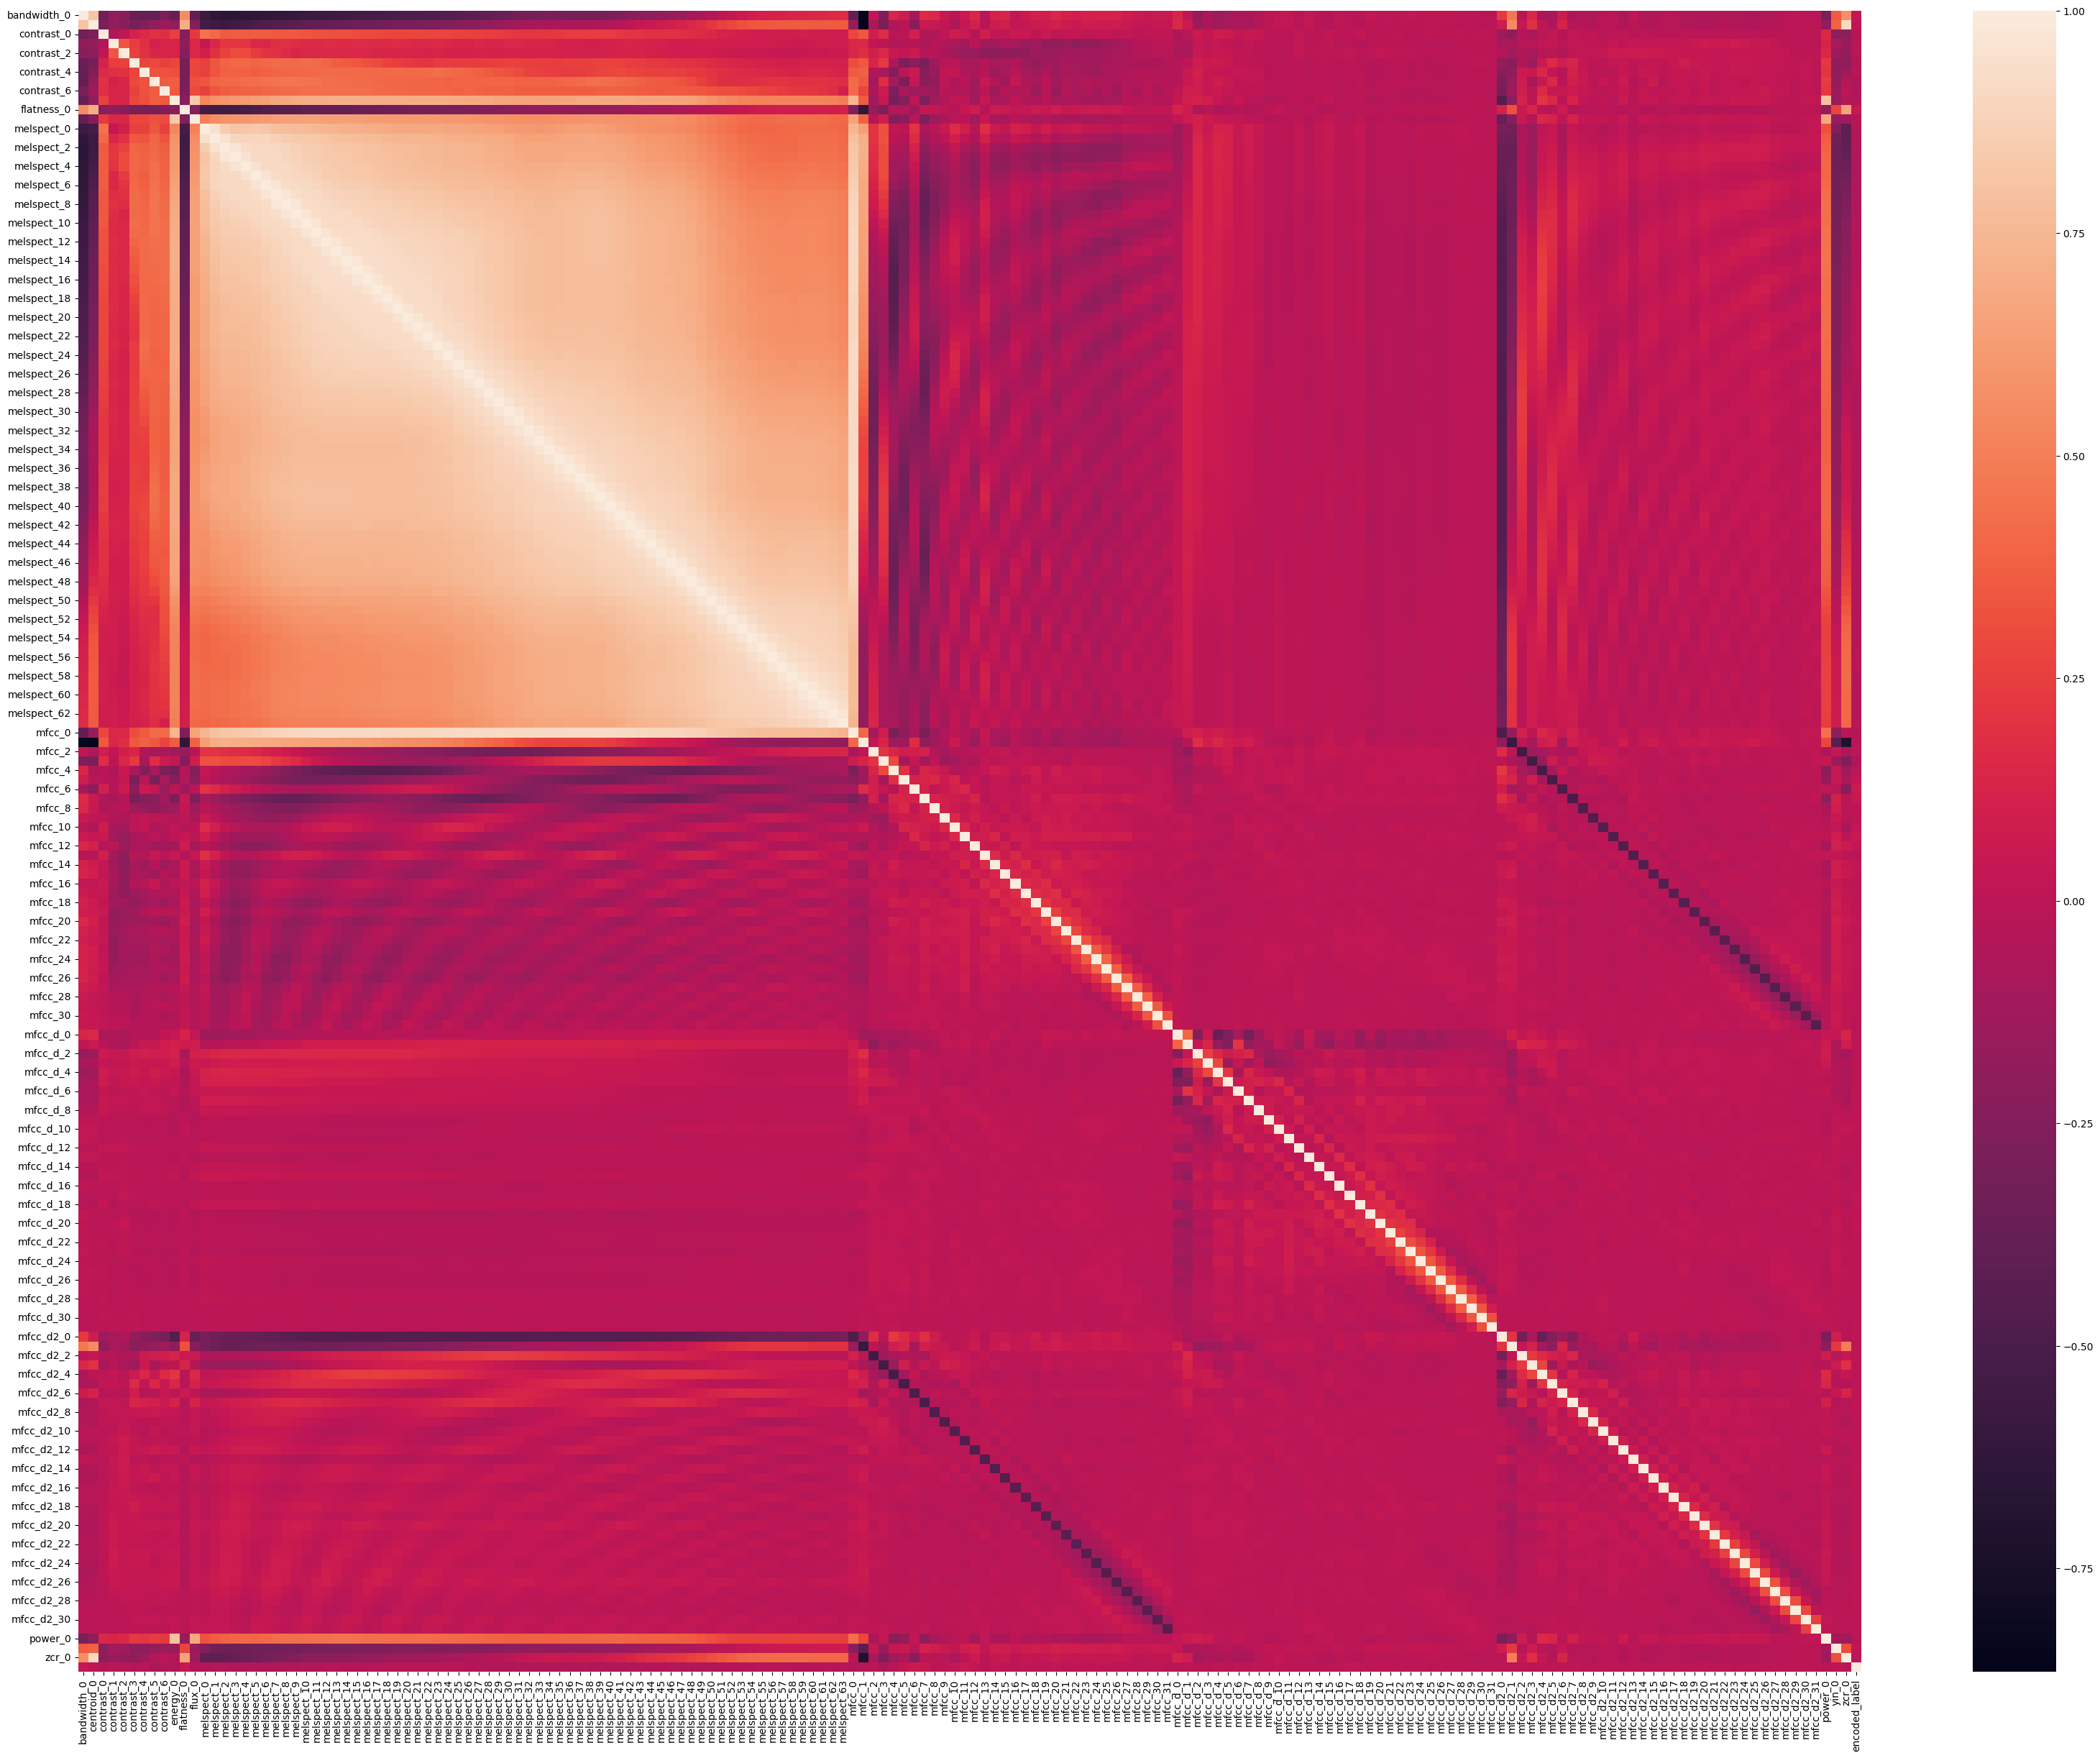

In [39]:
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix)
plt.show()

In [40]:
new_df.to_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df100.csv', index=False)

In [41]:
correlation_matrix.to_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\corr_df30.csv', index=False)

In [42]:
print(new_df.head())
print(new_df.shape)

   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3900.644073  2889.049473   16.274282    9.417471    5.553480   13.434897   
1  1385.955235   500.152755   17.818327   10.017926    6.967967   24.060781   
2   986.375646   486.088429   10.901464    5.318934    9.604191   27.445856   
3  2821.900824  1438.929368    5.481157   10.343477   11.021656    8.289373   
4   986.419612   469.830949    2.150323   14.489825   19.253875    9.553289   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0   10.929888   11.489753   12.203249   1.677356  ...    0.043019   -0.036784   
1   14.289769   17.917083   13.089963  19.312712  ...   -0.010266   -0.030265   
2   13.030354   18.225401   17.395027  16.359266  ...    0.077362    0.052671   
3   19.964211   11.330488   15.819080   2.203705  ...   -0.031458    0.030557   
4   14.676958   19.527705   17.472727   5.143209  ...   -0.018311    0.050365   

   mfcc_d2_29  mfcc_d2_30  mfcc_d2_31 

## Creating classifier based on the new number of samples

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm

In [8]:
new_df_cv = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df100.csv', index_col=0)
new_df = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df20.csv', index_col=0)

In [9]:
features = new_df_cv.drop(columns=['label', 'encoded_label'])
labels = new_df_cv['encoded_label']

print(f'Features shape: {features.shape}')
print(f'Labels shape: {labels.shape}')

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Features shape: (19930, 174)
Labels shape: (19930,)
Training data shape: (15944, 174)
Testing data shape: (3986, 174)


In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg.fit(features, labels)
importance = reg.feature_importances_

In [11]:
print(importance)

[0.00484338 0.00686436 0.00682229 0.00661725 0.00675144 0.00720028
 0.00685544 0.00659428 0.0020645  0.00530339 0.00386754 0.0044233
 0.00387739 0.00327041 0.00341322 0.00323813 0.00337067 0.00382573
 0.00328259 0.00439489 0.00308372 0.0030672  0.00321188 0.00457919
 0.00332404 0.00314266 0.00315217 0.00305572 0.0031049  0.00356765
 0.00375229 0.00353059 0.00428811 0.00389077 0.0042354  0.00344757
 0.00347646 0.00332284 0.00317492 0.00322778 0.00277699 0.00366609
 0.00392885 0.00398203 0.00327152 0.00312362 0.00304847 0.0033927
 0.00275926 0.00278345 0.00312282 0.00302291 0.00258439 0.00282116
 0.00339311 0.00307616 0.00260534 0.0026841  0.00295198 0.00309197
 0.00331222 0.00335869 0.00280245 0.00283541 0.00272177 0.00272874
 0.00276222 0.00258116 0.00248103 0.00239374 0.00258273 0.00277961
 0.00258188 0.00278658 0.00338777 0.0014855  0.00469849 0.00657495
 0.01438978 0.00716342 0.00717193 0.01060095 0.00778192 0.00680255
 0.00712618 0.00636583 0.00621623 0.00642926 0.00660508 0.007283

## Working with 100 split dataset

In [44]:
from sklearn.ensemble import RandomForestRegressor

new_df = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df100.csv', index_col=0)


features = new_df.drop(columns=['label', 'encoded_label'])
labels = new_df['encoded_label']

new_df.head(15)

In [45]:
reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg.fit(features, labels)
importance = reg.feature_importances_

feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importance})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances)

threshold = 0.01
important_features = feature_importances[feature_importances['importance'] > threshold]['feature'].tolist()

print(f'Selected important features: {important_features}')

         feature  importance
108     mfcc_d_1    0.022796
107     mfcc_d_0    0.018759
109     mfcc_d_2    0.015733
140    mfcc_d2_1    0.015063
142    mfcc_d2_3    0.014999
..           ...         ...
71   melspect_60    0.002498
62   melspect_51    0.002428
68   melspect_57    0.002376
8       energy_0    0.002343
75        mfcc_0    0.002051

[174 rows x 2 columns]
Selected important features: ['mfcc_d_1', 'mfcc_d_0', 'mfcc_d_2', 'mfcc_d2_1', 'mfcc_d2_3', 'mfcc_d_3', 'mfcc_d_4', 'mfcc_3', 'mfcc_d_5', 'mfcc_d2_4', 'mfcc_d2_0']


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = new_df[important_features]
labels = new_df['encoded_label']

X_train, X_temp, y_train, y_temp = train_test_split(selected_features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train)
X_val_selected = scaler.transform(X_val)
X_test_selected = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

best_classifiers = {}
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    print(f"Clf: {clf}")
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    best_classifiers[clf_name] = grid_search.best_estimator_
    print(f"Best {clf_name} parameters: {grid_search.best_params_}")
    print(f"Best {clf_name} cross-validation accuracy: {grid_search.best_score_}")

for clf_name, clf in best_classifiers.items():
    val_accuracy = clf.score(X_val_selected, y_val)
    print(f"{clf_name} validation accuracy: {val_accuracy}")

Training RandomForest...
Clf: RandomForestClassifier(n_jobs=-1, random_state=42)
Best RandomForest parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best RandomForest cross-validation accuracy: 0.2794784720852584
Training SVM...
Clf: SVC(random_state=42)
